## Video Pose Extractor

### Overview
This project utilizes MediaPipe, a highly efficient open-source framework for building multimodal (video, audio, any time-series data) applied ML pipelines. Specifically, we focus on its Pose Detection capabilities to analyze videos and extract human poses frame by frame. Our goal is to provide insights into human movements, applicable in sports analytics, animation, physical therapy, and various other fields.

In [3]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import os
import pickle
import numpy as np

2024-04-24 07:09:39.888770: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-24 07:09:39.926106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 07:09:39.926135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 07:09:39.927050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 07:09:39.932983: I tensorflow/core/platform/cpu_feature_guar

In [4]:
with open('./meta-har/exercise_pose/pose_landmarks.pkl', 'rb') as f:
    pose_landmarks = pickle.load(f)

In [15]:
labels = []

# get all labels [n][0]
for i in range(len(pose_landmarks)):
    labels.append(pose_landmarks[i][0])

In [62]:
labels = []
data = []
count = 0

for i in range(len(pose_landmarks)):
    for j in range(len(pose_landmarks[i][1])):
        count += 1
        labels.append(i)
        data.append(pose_landmarks[i][1][j])

In [2]:
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
video_path = './meta-har/video_dataset/barbell biceps curl/barbell biceps curl_1.mp4'
cap = cv2.VideoCapture(video_path)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


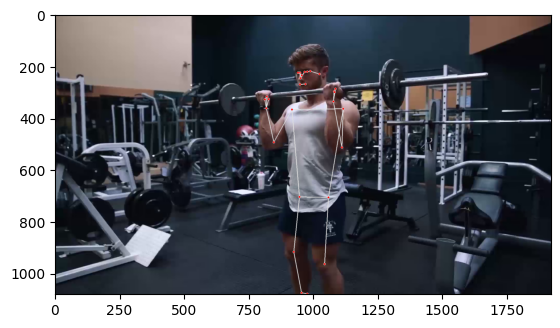

In [4]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

results_list = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Process the frame with MediaPipe Pose
    results = pose.process(frame_rgb)

    results_list.append(results)

    # Draw the pose landmarks on the frame on the first frame
    if len(results_list) == 1:
        if results.pose_landmarks:
            mp_drawing = mp.solutions.drawing_utils
            annotated_image = frame.copy()
            mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            cv2_imshow(annotated_image)

In [6]:
def get_all_results(video_dir):
    folders = os.listdir(video_dir)
    poses = []
    labels = []
    for folder in folders:
        videos = os.listdir(os.path.join(video_dir, folder))
        for video in videos:
            video_poses = []
            video_path = os.path.join(video_dir, folder, video)
            cap = cv2.VideoCapture(video_path)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(frame_rgb)
                video_poses.append(results.pose_landmarks if results.pose_landmarks else None)
            video_array = np.array(video_poses)
            poses.append(video_array)
            labels.append(folder)
        print(f'Finished processing {folder}')
    poses_array = np.array(poses)
    labels_array = np.array(labels)
    return poses_array, labels_array


In [7]:
video_dir = './meta-har/video_dataset'
poses, labels = get_all_results(video_dir)

Finished processing romanian deadlift
Finished processing incline bench press
Finished processing tricep dips
Finished processing deadlift
Finished processing bench press
Finished processing t bar row
Finished processing push-up
Finished processing barbell biceps curl
Finished processing pull Up
Finished processing lat pulldown
Finished processing hip thrust
Finished processing leg raises
Finished processing squat
Finished processing decline bench press
Finished processing lateral raise
Finished processing leg extension
Finished processing russian twist
Finished processing .ipynb_checkpoints
Finished processing chest fly machine
Finished processing hammer curl
Finished processing plank
Finished processing tricep Pushdown
Finished processing shoulder press


/tmp/ipykernel_396850/1514727090.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  poses_array = np.array(poses)


In [45]:
# get number of videos for each class
unique, counts = np.unique(labels, return_counts=True)

print(dict(zip(unique, counts)))

{'barbell biceps curl': 62, 'bench press': 61, 'chest fly machine': 28, 'deadlift': 32, 'decline bench press': 12, 'hammer curl': 19, 'hip thrust': 18, 'incline bench press': 33, 'lat pulldown': 51, 'lateral raise': 37, 'leg extension': 25, 'leg raises': 21, 'plank': 7, 'pull Up': 26, 'push-up': 56, 'romanian deadlift': 14, 'russian twist': 13, 'shoulder press': 17, 'squat': 29, 't bar row': 21, 'tricep Pushdown': 50, 'tricep dips': 20}


In [6]:
pose_landmarks = []

In [ ]:
# save numpy arrays to ./meta-har/exercise_pose create folder exercise_pose
if not os.path.exists('./meta-har/exercise_pose'):
    os.makedirs('./meta-har/exercise_pose')

In [335]:
np.save('./meta-har/exercise_pose/ex_poses_landmark_dataset.npy', pose_landmarks)

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [3]:
# pickle the pose_landmarks
with open('./meta-har/exercise_pose/pose_landmarks.pkl', 'wb') as f:
    pickle.dump(pose_landmarks, f)